In [1]:
# -*- coding: utf-8 -*-
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt

matplotlib.rcParams['axes.unicode_minus'] = False

## ARMA(1, 1)
___
α = 0.5 and β = −0.5로 정하고 시계열을 생성해보자.
$${ x }_{ t }=0.5{ x }_{ t-1 }+{ w }_{ t }-0.5{ w }_{ t-1 }$$

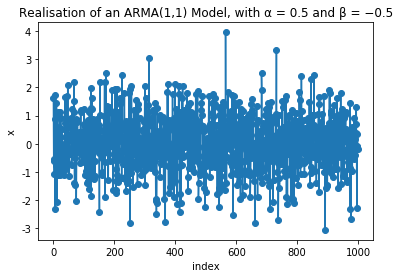

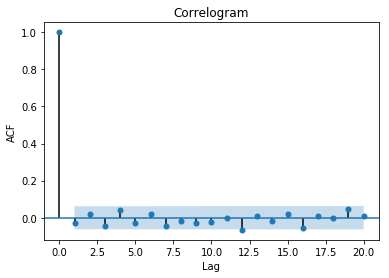

In [2]:
np.random.seed(1)
proc = sm.tsa.ArmaProcess([1, -0.5], [1, -0.5])
samples = proc.generate_sample(1000)

plt.plot(samples, 'o-')
plt.title("Realisation of an ARMA(1,1) Model, with α = 0.5 and β = −0.5")
plt.xlabel("index")
plt.ylabel("x")
plt.show()

sm.graphics.tsa.plot_acf(samples, lags=20)
plt.title("Correlogram")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

위의 시계열로 α, β을 추정해보자.

In [3]:
arma = sm.tsa.ARMA(samples, (1, 1))
ret = arma.fit(disp=False)
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -1397.793
Method:                       css-mle   S.D. of innovations              0.979
Date:                Fri, 07 Sep 2018   AIC                           2803.586
Time:                        23:05:28   BIC                           2823.217
Sample:                             0   HQIC                          2811.048
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0387      0.030      1.278      0.201      -0.021       0.098
ar.L1.y       -0.7935      0.115     -6.894      0.000      -1.019      -0.568
ma.L1.y        0.7551      0.123      6.161      0.0

## ARMA(2, 2)
___
${ \alpha  }_{ 1 }=0.5,{ \alpha  }_{ 2 }=-0.25,{ \beta  }_{ 1 }=0.5,{ \beta  }_{ 2 }=-0.3$로 정하고 시계열을 생성해보자.
$${ x }_{ t }=0.5{ x }_{ t-1 }-0.25{ x }_{ t-2 }+\dots +0.5{ w }_{ t-1 }-0.3{ w }_{ t-2 }$$

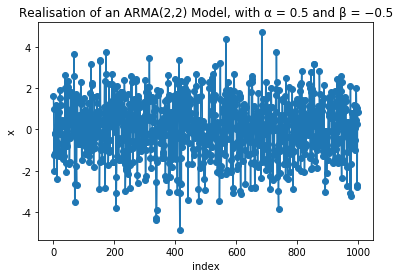

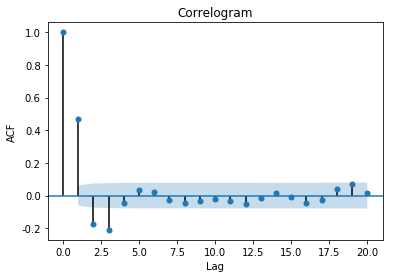

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1395.703
Method:                       css-mle   S.D. of innovations              0.976
Date:                Fri, 07 Sep 2018   AIC                           2803.407
Time:                        23:05:30   BIC                           2832.853
Sample:                             0   HQIC                          2814.598
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0625      0.048      1.298      0.195      -0.032       0.157
ar.L1.y        0.4889      0.123      3.974      0.000       0.248       0.730
ar.L2.y       -0.2702      0.035     -7.735      0.0

In [4]:
np.random.seed(1)
proc = sm.tsa.ArmaProcess([1, -0.5, 0.25], [1, 0.5, -0.3])
samples = proc.generate_sample(1000)

plt.plot(samples, 'o-')
plt.title("Realisation of an ARMA(2,2) Model, with α = 0.5 and β = −0.5")
plt.xlabel("index")
plt.ylabel("x")
plt.show()

sm.graphics.tsa.plot_acf(samples, lags=20)
plt.title("Correlogram")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

arma = sm.tsa.ARMA(samples, (2, 2))
ret = arma.fit(disp=False)
print(ret.summary())
print("\n========== 신뢰구간(95%) ==========")
print(ret.conf_int(alpha=0.05))

## Choosing the Best ARMA(p,q) Model
___

ARMA(3, 2)로 시계열을 생성

In [5]:
np.random.seed(1)
proc = sm.tsa.ArmaProcess([1, -0.5, 0.25, -0.4], [1, 0.5, -0.3])
samples = proc.generate_sample(1000)

aics = np.zeros((4, 4))
aics.fill(np.infty)

for i in range(4):
	for j in range(4):
		try:
			arma = sm.tsa.ARMA(samples, (i, j))
			ret = arma.fit(disp=False)
			aics[i][j] = ret.aic
		except Exception as e:
			pass

print(aics)
min_idx = np.unravel_index(np.argmin(aics), aics.shape)
print("\nMinimum AIC: {0}\nIdx: {1}\n".format(np.min(aics), min_idx))

arma = sm.tsa.ARMA(samples, (min_idx[0], min_idx[1]))
ret = arma.fit(disp=False)
print(ret.summary())

C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

[[3593.58214818 2927.87473465 2926.38598897           inf]
 [3349.61759678 2927.46706795           inf           inf]
 [3282.25382981 2912.30187899           inf           inf]
 [2964.06962766 2812.3113338  2804.74805773 2806.30166681]]

Minimum AIC: 2804.748057727327
Idx: (3, 2)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(3, 2)   Log Likelihood               -1395.374
Method:                       css-mle   S.D. of innovations              0.976
Date:                Fri, 07 Sep 2018   AIC                           2804.748
Time:                        23:05:36   BIC                           2839.102
Sample:                             0   HQIC                          2817.805
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
-------

## Ljung-Box Test

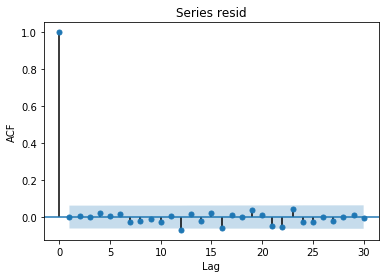

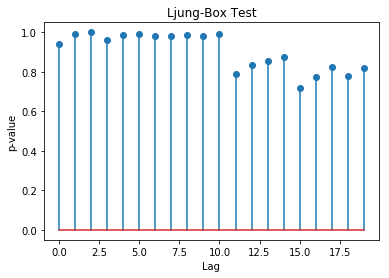

pvalue (Lag: 0): 0.9421902223462031
pvalue (Lag: 1): 0.9925640480141067
pvalue (Lag: 2): 0.9994621681236346
pvalue (Lag: 3): 0.9622092997080691
pvalue (Lag: 4): 0.9870921810429991
pvalue (Lag: 5): 0.9897927326230125
pvalue (Lag: 6): 0.9819898166600525
pvalue (Lag: 7): 0.9796255999774673
pvalue (Lag: 8): 0.9879094466055884
pvalue (Lag: 9): 0.9809942187521092
pvalue (Lag: 10): 0.9902443153924426
pvalue (Lag: 11): 0.7886683532058851
pvalue (Lag: 12): 0.8328630782498143
pvalue (Lag: 13): 0.8563229801334101
pvalue (Lag: 14): 0.8750149333671121
pvalue (Lag: 15): 0.7184804601275666
pvalue (Lag: 16): 0.7729429742321099
pvalue (Lag: 17): 0.8238159247077246
pvalue (Lag: 18): 0.7798850019041893
pvalue (Lag: 19): 0.8198906951847591


In [6]:
sm.graphics.tsa.plot_acf(ret.resid, lags=30)
plt.title("Series resid")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

qvalue, pvalue = sm.stats.acorr_ljungbox(ret.resid, 20)
plt.stem(pvalue)
plt.title("Ljung-Box Test")
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.show()

for i in range(len(pvalue)):
    print("pvalue (Lag: {0}): {1}".format(i, pvalue[i]))

## Financial Data

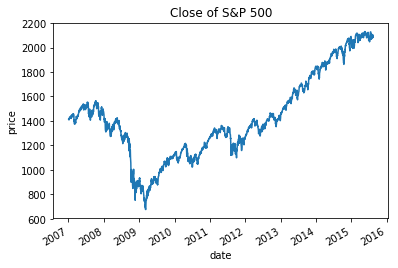

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Anaconda3\lib\site-

[[-12451.05656484 -12481.18057239 -12484.63144991 -12484.52175915]
 [-12477.37427741 -12483.02412537 -12484.33892904             inf]
 [-12486.11382898 -12485.48886305 -12480.54600066             inf]
 [-12485.69170016 -12483.79241971 -12482.16530907             inf]]

Minimum AIC: -12486.11382898119
Idx: (2, 0)



C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 2168
Model:                     ARMA(2, 0)   Log Likelihood                6247.057
Method:                       css-mle   S.D. of innovations              0.014
Date:                Fri, 07 Sep 2018   AIC                         -12486.114
Time:                        23:05:51   BIC                         -12463.388
Sample:                             0   HQIC                        -12477.803
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0002      0.000      0.729      0.466      -0.000       0.001
ar.L1.log_return    -0.1219      0.021     -5.691      0.000      -0.164      -0.080
ar.L2.log_return    -0.0703 

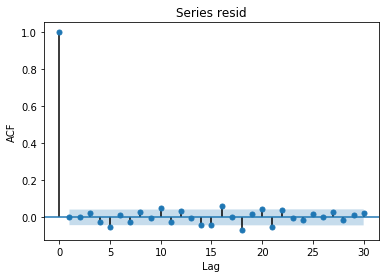

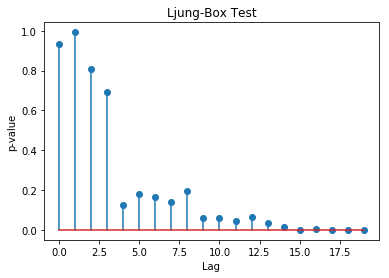

pvalue (Lag: 0): 0.9319383417201735
pvalue (Lag: 1): 0.9922797145873041
pvalue (Lag: 2): 0.8081058891360301
pvalue (Lag: 3): 0.6923517620914857
pvalue (Lag: 4): 0.1269436270577824
pvalue (Lag: 5): 0.1817069272441827
pvalue (Lag: 6): 0.16443490685602918
pvalue (Lag: 7): 0.14030520053387038
pvalue (Lag: 8): 0.1951641630762491
pvalue (Lag: 9): 0.06135334632986019
pvalue (Lag: 10): 0.06039939310887262
pvalue (Lag: 11): 0.04550473144841159
pvalue (Lag: 12): 0.06609337545205995
pvalue (Lag: 13): 0.032702555287744295
pvalue (Lag: 14): 0.014541490343113363
pvalue (Lag: 15): 0.0014383136829743254
pvalue (Lag: 16): 0.0023180604184551167
pvalue (Lag: 17): 0.00013844225960589317
pvalue (Lag: 18): 0.00017754096260443877
pvalue (Lag: 19): 7.669396287071265e-05


In [7]:
day_data = pd.read_csv("GSPC.csv")
day_data["Date"] = pd.to_datetime(day_data["Date"], format='%Y-%m-%d')
day_data = day_data.set_index("Date", inplace=False)

day_data["Close"].plot()
plt.title("Close of S&P 500")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

day_data['log_return'] = np.log(day_data['Close']).diff()
day_data = day_data.dropna()

aics = np.zeros((4, 4))
aics.fill(np.infty)

for i in range(4):
	for j in range(4):
		try:
			arma = sm.tsa.ARMA(day_data['log_return'], (i, j))
			ret = arma.fit(disp=False)
			aics[i][j] = ret.aic
		except Exception as e:
			pass
        
print(aics)
min_idx = np.unravel_index(np.argmin(aics), aics.shape)
print("\nMinimum AIC: {0}\nIdx: {1}\n".format(np.min(aics), min_idx))

arma = sm.tsa.ARMA(day_data['log_return'], (min_idx[0], min_idx[1]))
ret = arma.fit(disp=False)
print(ret.summary())

sm.graphics.tsa.plot_acf(ret.resid, lags=30)
plt.title("Series resid")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

qvalue, pvalue = sm.stats.acorr_ljungbox(ret.resid, 20)
plt.stem(pvalue)
plt.title("Ljung-Box Test")
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.show()

for i in range(len(pvalue)):
    print("pvalue (Lag: {0}): {1}".format(i, pvalue[i]))